<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/RIDGE_LASSO_REGRESSION_INDEPTH_INTUITION_WITH_EXAMPLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ridge and Lasso Regression?

We use Ridge and Lasso to basically convert the high bias and high variance into low bias and low variance so that our model could be called a generalized model which shows equal amount of accuracy in the training and test dataset.

The basic concept on which this ridge and lasso works is giving priority in minimization of the cost function.

#For Ridge Regression

The formula for Ridge Regression is given as 

summation i=1 to n (y-y^)**2 + λ(slope)**2----> we basically try to reduce this equation value which is also called loss or cost function

meaning of steep slope

for a unit change in x direction there is a drastic change in the value of slope between two points.

So whenever there is a steep slope the it leads to the condition of overfitting.

The value of λ ranges from 0 to 1, bhut can be any finite number greater than zero.

In ridge regression formula above we saw the additional parameter λ and slope, so it basically means that it overcomes the problem associated with a simple linear regression model. This is done mainly by choosing the best fit line where the summation of cost and λ function goes minimum rather than just choosing the cost function and minimzing it. So in this manner it helps in choosing the best fit line with a greater accuracy.

Moreover we can say that we are just penalizing (features that have higher slopes) the point of higher slopes into lower ones so that we achieve the best fit line more accurately.

The formula where we have written λ(slope)**2 is just for a single feature, if there are more features in our model then we can simply add the number of slopes here--> λ(slope1 +slope2 +++ slope)**2 

This selection of the best fit line in ridge regression is not done instantly rather it goes through successful iterations as is done in gradient descent and then the best fit is selected.

So finally when the best fit line is achieved then we can say that with the unit increase in x direction there will be less change in value for the slope i.e., a less steeper slope and minimization of overfitting problem.

The selection of lambda in the equation is done through cross validation

Also if the value of λ is high say 0.6 then the line will tend to approach to 0 giving rise to a straight line.

#For Lasso Regression

The formula for lasso is slightly different from ridge regression as:

summation i=1 to n (y-y^)**2 + λ|slope|     --------> here || means magnitude of slope

lasso regression not only helps in overcomibng the overfitting scenario but it also helps in feature selection.

The way it helps in feature selection is, it basically removes those features whose slope value approaches to 0 as was not in the case of ridge regression because in ridge regression the value tends to approach closer to 0 but not converge to 0. But, here as we are not taking squares and just taking the value so the value will approach 0 and we will neglect those features. So, basically we can compare lasso regression with the dropout function in convolution neural network and ridge with the max pooling.





In [1]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=57dd232c291ae9bc4e255054d5c74f07babe73722bfb69b856dee3a84ddc54e6
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [2]:
from pyforest import *

In [3]:
from sklearn.datasets import load_boston

In [4]:
df= load_boston()

In [8]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
data= pd.DataFrame(df.data, columns=df.feature_names)

<IPython.core.display.Javascript object>

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
data["Price"]= df.target

In [15]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,targets,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


In [25]:
X= data.drop(["targets","Price"], axis=1)

In [26]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
y= data.Price

In [28]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [16]:
#performing ridge regression and selecting the best value of alpha/lambda using hyperparameter tuning technique using grid search cv

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
model= LinearRegression()

In [30]:
mse= cross_val_score(model,X,y,scoring="neg_mean_squared_error", cv=5)

mean_mse= np.mean(mse)

print(mean_mse)

<IPython.core.display.Javascript object>

-37.13180746769886


In [31]:
ridge= Ridge()

In [32]:
parameters= {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,60,70,80,90,100]}

ridge_regressor= GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error", cv=10)

ridge_regressor.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 60, 70, 80, 90, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [33]:
ridge_regressor.best_params_

{'alpha': 100}

In [49]:
ridge_regressor.best_score_, ridge_regressor.score

(-29.61522009733512,
 <bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score=nan,
              estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                              max_iter=None, normalize=False, random_state=None,
                              solver='auto', tol=0.001),
              iid='deprecated', n_jobs=None,
              param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                    20, 30, 40, 50, 60, 70, 80, 90, 100]},
              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
              scoring='neg_mean_squared_error', verbose=0)>)

In [35]:
ridge_regressor.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
ridge_regressor.cv_results_

{'mean_fit_time': array([0.00264988, 0.00195441, 0.00183296, 0.00189421, 0.00189497,
        0.00188582, 0.00188415, 0.00194638, 0.00185471, 0.00185597,
        0.0018749 , 0.0019558 , 0.00216732, 0.00224824, 0.00203075,
        0.00187466, 0.00196943]),
 'mean_score_time': array([0.00098093, 0.0009506 , 0.00092509, 0.00093627, 0.00091834,
        0.00093317, 0.00092363, 0.00093074, 0.00090477, 0.00091279,
        0.00091102, 0.00093682, 0.00105159, 0.00109487, 0.00096939,
        0.00093462, 0.00094209]),
 'mean_test_score': array([-34.70525594, -34.70525594, -34.70525593, -34.70368109,
        -34.68970177, -34.07824621, -33.55878726, -33.00581779,
        -32.0894694 , -31.4090678 , -30.90175647, -30.51977513,
        -30.22993781, -30.00900266, -29.84039921, -29.71209814,
        -29.6152201 ]),
 'param_alpha': masked_array(data=[1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                    50, 60, 70, 80, 90, 100],
              mask=[False, False, False, False, Fals

In [39]:
df2= pd.DataFrame(ridge_regressor.cv_results_)

<IPython.core.display.Javascript object>

In [40]:
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002650,0.001912,0.000981,0.000105,1e-15,{'alpha': 1e-15},-9.286947,-14.151283,-14.073606,-35.206924,-31.885117,-19.835878,-9.947269,-168.375380,-33.329745,-10.960411,-34.705256,45.573999,17
1,0.001954,0.000136,0.000951,0.000057,1e-10,{'alpha': 1e-10},-9.286947,-14.151283,-14.073606,-35.206924,-31.885117,-19.835878,-9.947269,-168.375380,-33.329745,-10.960411,-34.705256,45.573999,16
2,0.001833,0.000020,0.000925,0.000040,1e-08,{'alpha': 1e-08},-9.286947,-14.151283,-14.073606,-35.206924,-31.885117,-19.835878,-9.947269,-168.375380,-33.329745,-10.960411,-34.705256,45.573999,15
3,0.001894,0.000055,0.000936,0.000053,0.001,{'alpha': 0.001},-9.286834,-14.148360,-14.064952,-35.208896,-31.880786,-19.833476,-9.945916,-168.376636,-33.330230,-10.960725,-34.703681,45.575061,14
4,0.001895,0.000038,0.000918,0.000038,0.01,{'alpha': 0.01},-9.285851,-14.122273,-13.988177,-35.226578,-31.842153,-19.812059,-9.933907,-168.387777,-33.334628,-10.963614,-34.689702,45.584490,13
5,0.001886,0.000023,0.000933,0.000022,1,{'alpha': 1},-9.317663,-12.608069,-10.798594,-36.609365,-29.621092,-18.625981,-9.466419,-168.498311,-33.797495,-11.439473,-34.078246,45.900034,12
6,0.001884,0.000027,0.000924,0.000018,5,{'alpha': 5},-9.542136,-11.674306,-9.953827,-38.381479,-28.157426,-18.078158,-9.651221,-163.783845,-34.010735,-12.354740,-33.558787,44.592556,11
7,0.001946,0.000077,0.000931,0.000026,10,{'alpha': 10},-9.674399,-11.671956,-9.919451,-39.218262,-28.104045,-18.292840,-9.929569,-157.081355,-33.442669,-12.723632,-33.005818,42.603254,10
8,0.001855,0.000022,0.000905,0.000016,20,{'alpha': 20},-9.839248,-11.991213,-9.987773,-40.339704,-28.705988,-18.979876,-10.346395,-145.520221,-32.130866,-13.053410,-32.089469,39.167005,9
9,0.001856,0.000022,0.000913,0.000021,30,{'alpha': 30},-9.966166,-12.349228,-10.109903,-41.273923,-29.465042,-19.685141,-10.678955,-136.331194,-30.982744,-13.248382,-31.409068,36.446752,8


In [41]:
lasso= Lasso()

In [42]:
parameters= {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,60,70,80,90,100]}

lasso_regressor= GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error", cv=10)

lasso_regressor.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 60, 70, 80, 90, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [43]:
lasso_regressor.best_estimator_, lasso_regressor.best_params_, lasso_regressor.best_score_

(Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 {'alpha': 100},
 -29.61522009733512)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=0)

In [46]:
prediction_ridge= ridge_regressor.predict(X_test)

prediction_lasso= lasso_regressor.predict(X_test)

In [47]:
prediction_lasso

array([23.96675946, 24.98996014, 27.5915891 , 14.26059397, 19.63842944,
       21.33417836, 21.32039718, 23.27239931, 20.30837677, 19.48226179,
        6.4578138 , 14.28838187, 18.59820449,  7.32675586, 36.99591747,
       31.36360797, 22.27052891, 35.16096521, 30.99397818, 24.25137539,
       25.40646048, 24.34913685, 20.21632652, 30.0992825 , 22.68378433,
       13.94885033, 18.64684143, 21.48729544, 33.26170271, 19.79217513,
       18.17155893, 19.9695722 , 20.42970393, 23.50528313, 28.90147149,
       20.77821424, 11.23603614, 25.21197341, 16.33605596, 13.74459083,
       24.96162953, 20.32082943, 21.56714797, 16.00431973, 22.631114  ,
       24.95003631, 18.4770964 , 24.0302334 , 12.20742324, 24.00507962,
       21.73290773, 17.56687132, 24.74921266, 28.65328508, 13.58721717,
       21.3260628 , 20.50282091, 15.43442841, 15.56550274, 19.58519135,
       18.94927305, 21.87657392, 31.86147714, 31.60936099, 18.30851646,
       31.83190056, 19.49024654, 18.37266891, 17.08246064, 22.88

In [48]:
prediction_ridge

array([23.96675946, 24.98996014, 27.5915891 , 14.26059397, 19.63842944,
       21.33417836, 21.32039718, 23.27239931, 20.30837677, 19.48226179,
        6.4578138 , 14.28838187, 18.59820449,  7.32675586, 36.99591747,
       31.36360797, 22.27052891, 35.16096521, 30.99397818, 24.25137539,
       25.40646048, 24.34913685, 20.21632652, 30.0992825 , 22.68378433,
       13.94885033, 18.64684143, 21.48729544, 33.26170271, 19.79217513,
       18.17155893, 19.9695722 , 20.42970393, 23.50528313, 28.90147149,
       20.77821424, 11.23603614, 25.21197341, 16.33605596, 13.74459083,
       24.96162953, 20.32082943, 21.56714797, 16.00431973, 22.631114  ,
       24.95003631, 18.4770964 , 24.0302334 , 12.20742324, 24.00507962,
       21.73290773, 17.56687132, 24.74921266, 28.65328508, 13.58721717,
       21.3260628 , 20.50282091, 15.43442841, 15.56550274, 19.58519135,
       18.94927305, 21.87657392, 31.86147714, 31.60936099, 18.30851646,
       31.83190056, 19.49024654, 18.37266891, 17.08246064, 22.88

In [50]:
import seaborn as sns

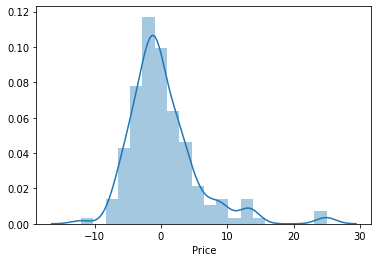

In [52]:
sns.distplot(y_test-prediction_lasso)

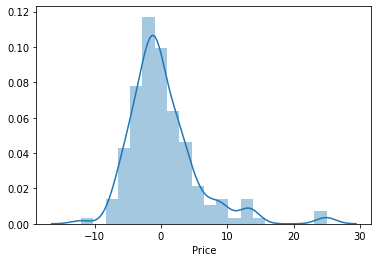

In [53]:
sns.distplot(y_test-prediction_ridge)